# Capstone Project 1 EDA 
## 2016-2017 NBA Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# import csv files
pbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/player_box_score_cleaned.csv')

In [3]:
tbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/team_box_score_cleaned.csv')

In [4]:

pbpdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/play_by_play_cleaned.csv')

In [ ]:
tbsdf.info()

In [294]:
# create a new df for plotting that includes the NBA teams and their average assists/game
team_assist_df = tbsdf[['TEAMS', 'A']]
tadf = pd.pivot_table(team_assist_df, index=['TEAMS'], aggfunc=np.mean)
tadf.reset_index().head()

,TEAMS,A
0,Atlanta,23.634146
1,Boston,25.231707
2,Brooklyn,21.414634
3,Charlotte,23.060976
4,Chicago,22.573171


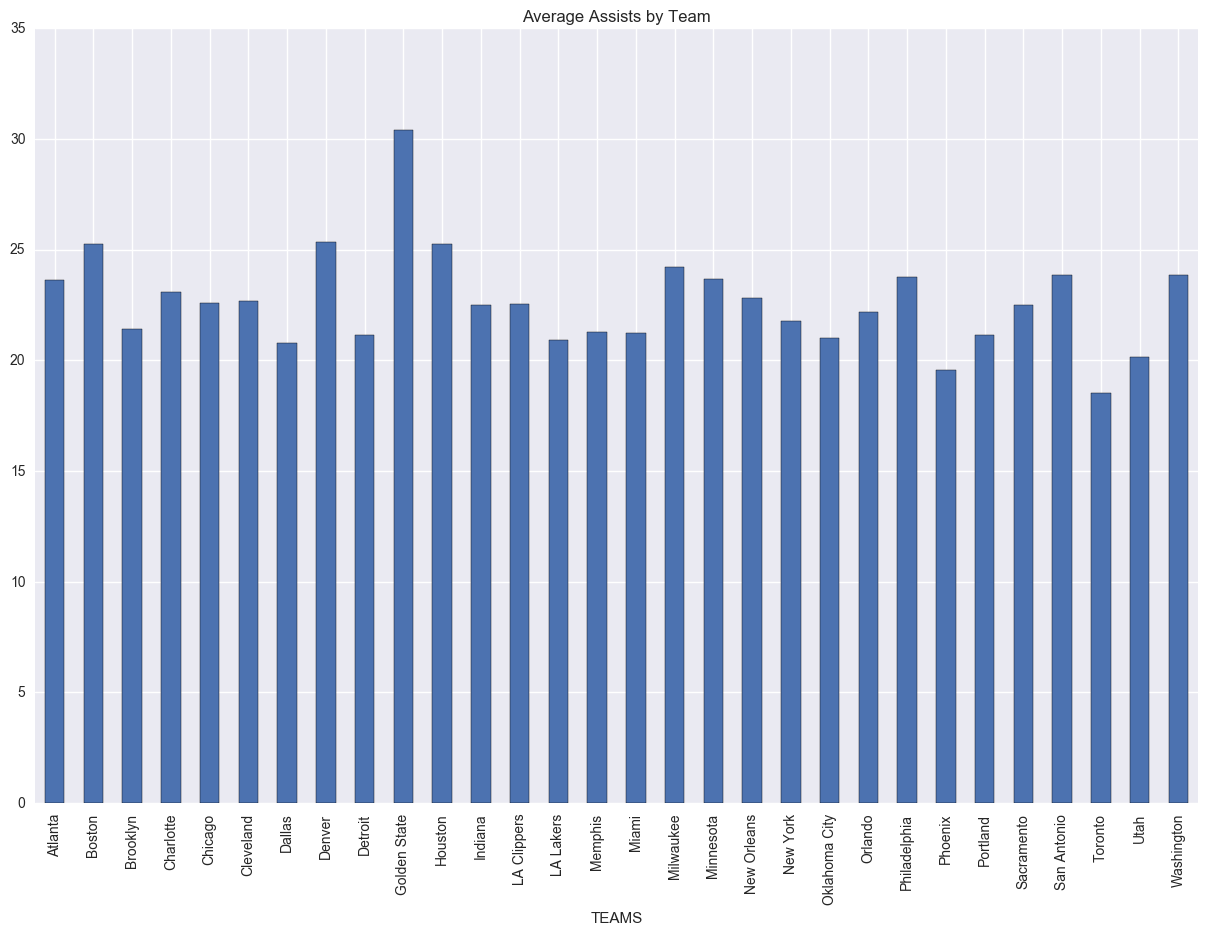

In [295]:
ax = tadf.plot(kind='bar', 
               title='Average Assists by Team', 
               figsize=(15,10), 
               legend=False)

In [298]:
# create a new df that includes the average possessions gained by steals and rebounds
team_reb_df = tbsdf[['TEAMS', 'OR', 'DR', 'ST']]
team_reb_df = team_reb_df.assign(poss_gain = team_reb_df.OR + team_reb_df.DR + team_reb_df.ST)
team_poss_df = pd.pivot_table(team_reb_df, index=['TEAMS'], aggfunc=np.mean)
team_poss_df = team_poss_df['poss_gain']

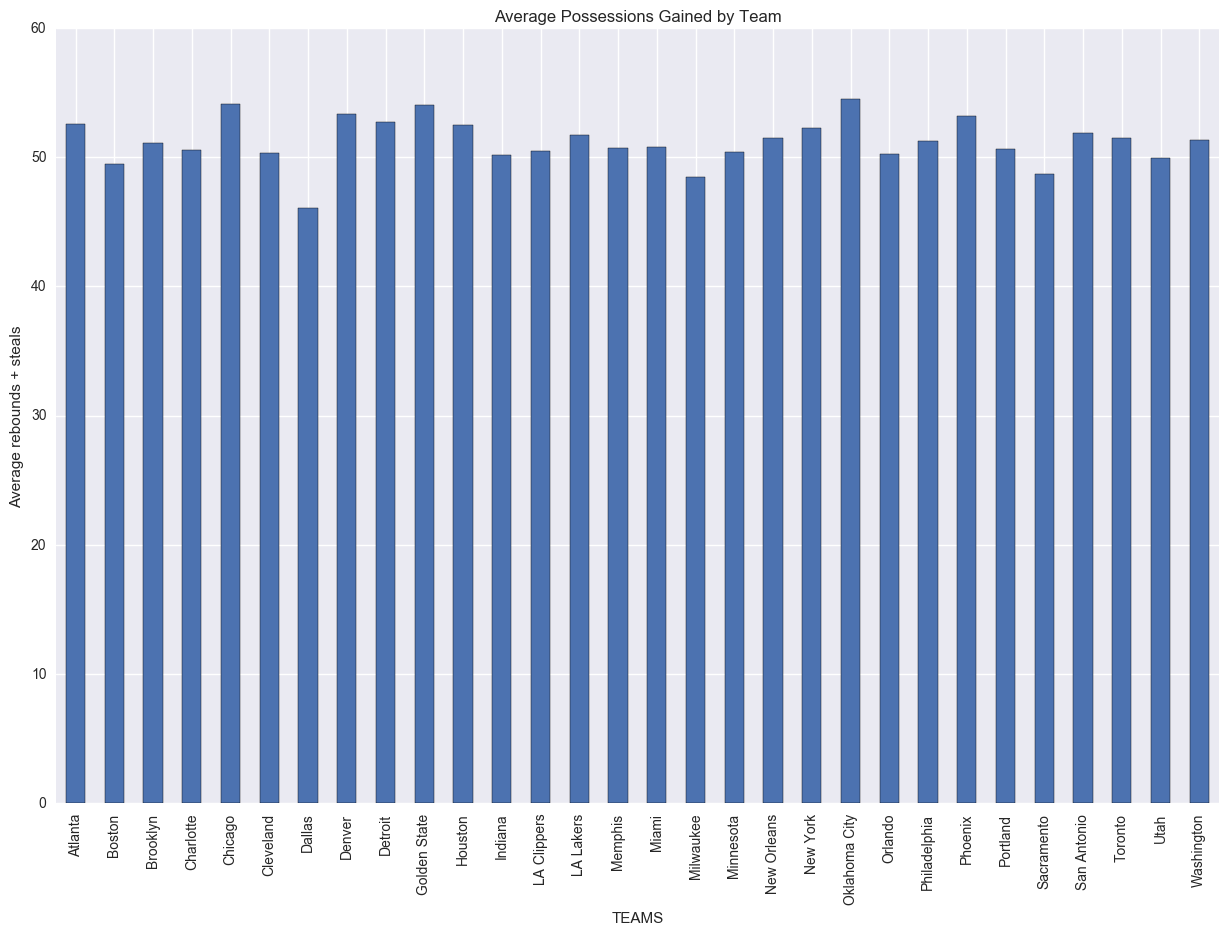

In [299]:
ax = team_poss_df.plot(kind='bar',
                  title='Average Possessions Gained by Team',
                  figsize=(15,10),
                  legend=False)
ax.set_ylabel('Average rebounds + steals')

## Shot Chart Exploration

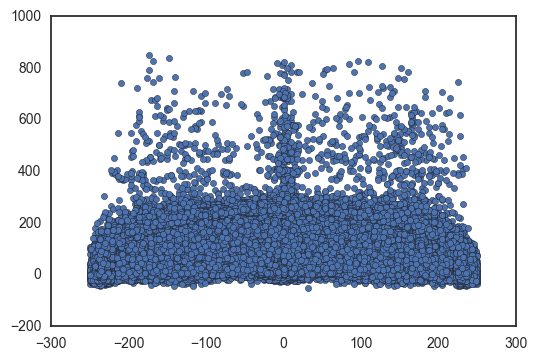

In [301]:
sns.set_style('white')
sns.set_color_codes()
plt.scatter(pbpdf.original_x, pbpdf.original_y)
plt.show()


In [302]:
# the function below was written by Savvas Tjortoglou
# http://savvastjortjoglou.com/nba-shot-sharts.html

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax



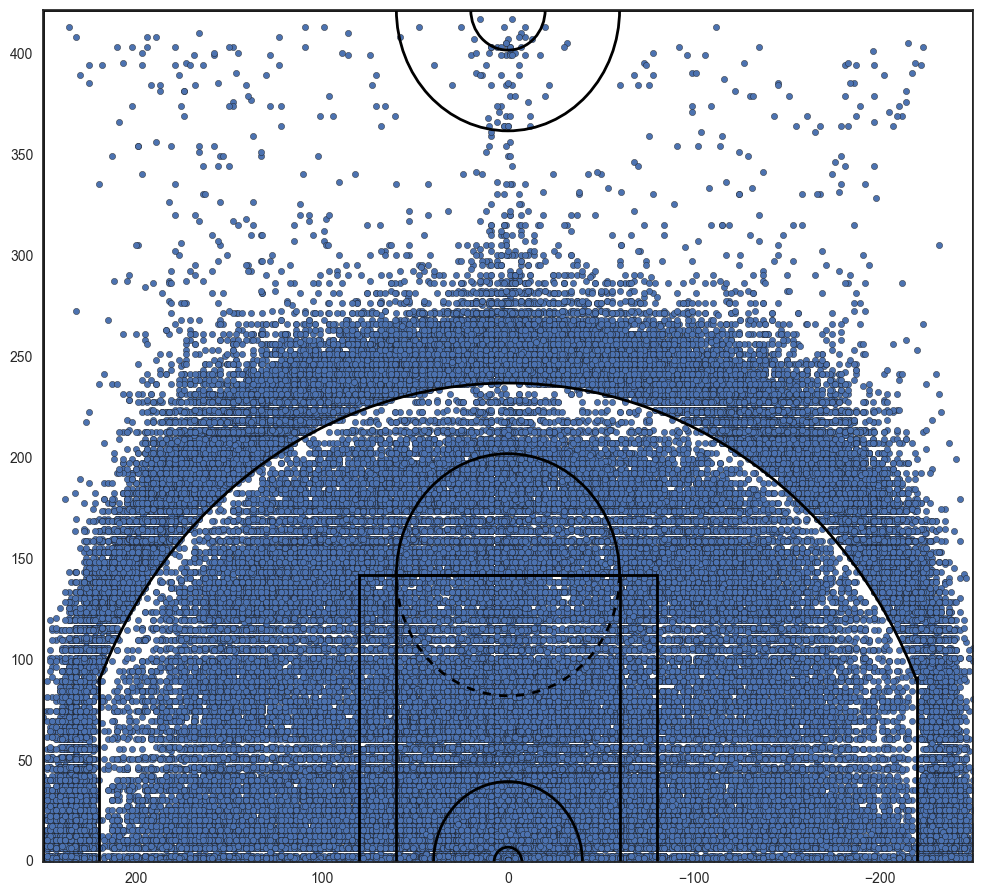

In [303]:
plt.figure(figsize=(12,11))
plt.scatter(pbpdf.original_x, pbpdf.original_y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(250,-250)
plt.ylim(0,422.5)
plt.show()

In [ ]:
cmap = plt.cm.YlOrRd_r

joint_shot_chart = sns.jointplot(pbpdf.original_x, 
                                 pbpdf.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)
ax = joint_shot_chart.ax_joint
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
plt.show()

In [305]:

shot_df = pbpdf[['team_in_possession','original_x', 'original_y', 'result']]
shot_df.head()




,team_in_possession,original_x,original_y,result
0,NaN,NaN,NaN,NaN
1,NYK,NaN,NaN,NaN
2,NYK,4.0,8.0,made
3,CLE,-11.0,36.0,missed
4,NYK,NaN,NaN,NaN


In [307]:
shot_df = shot_df.dropna()

shot_df = shot_df[(shot_df.result == 'made') & (shot_df.team_in_possession == 'SAC')]

shot_df = shot_df.drop('result', axis=1)
shot_df = shot_df.drop('team_in_possession', axis=1)
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 5323 to 566419
Data columns (total 2 columns):
original_x    3099 non-null float64
original_y    3099 non-null float64
dtypes: float64(2)
memory usage: 72.6 KB


C:\Users\Mike\Anaconda2\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


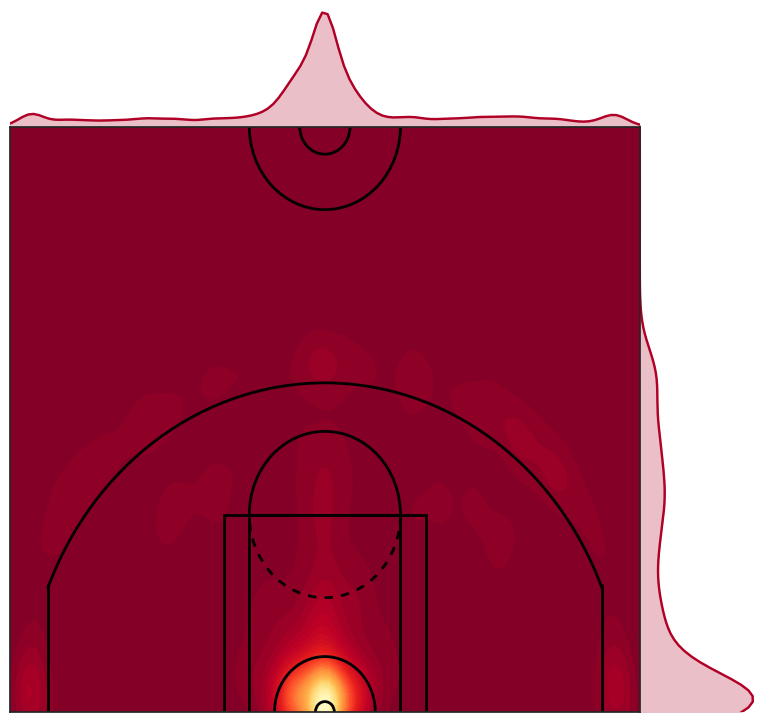

In [309]:
cmap = plt.cm.YlOrRd_r
joint_shot_chart = sns.jointplot(shot_df.original_x, 
                                 shot_df.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)
joint_shot_chart.fig.set_size_inches(8.72,8)
ax = joint_shot_chart.ax_joint
#dims = (11.7, 8.27)
#fig = plt.subplots(figsize=dims)
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
#plt.figure(figsize=(8,8))


## Total Made Shots + Total Assists / Total Shots By Player

In [311]:
pd.set_option('display.max_columns', 60)
pbpdf.head()

,game_id,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,play_id,team_in_possession,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,remaining_time_sec,elapsed_sec,play_length_sec
0,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,0,0,0,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,720,0,0
1,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,0,0,1,NYK,jump ball,NaN,Joakim Noah,Tristan Thompson,NaN,NaN,NaN,0,NaN,0,Tristan Thompson,0,Derrick Rose,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Thompson vs. Noah: Tip to Rose,720,0,0
2,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,2,0,2,NYK,shot,Joakim Noah,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Derrick Rose,2,NaN,NaN,made,NaN,Driving Layup,1.0,4.0,8.0,24.6,5.8,Rose 1' Driving Layup (2 PTS) (Noah 1 AST),700,20,20
3,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,2,0,3,CLE,miss,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Kevin Love,0,NaN,NaN,missed,NaN,Hook Shot,4.0,-11.0,36.0,23.9,85.4,MISS Love 4' Hook Shot,686,34,14
4,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,2,0,4,NYK,rebound,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Joakim Noah,0,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Noah REBOUND (Off:0 Def:1),683,37,3


In [312]:
player_poss_df = pbpdf[['player', 'assist', 'type', 'result']]
player_poss_df.head()

,player,assist,type,result
0,NaN,NaN,start of period,NaN
1,Tristan Thompson,NaN,jump ball,NaN
2,Derrick Rose,Joakim Noah,Driving Layup,made
3,Kevin Love,NaN,Hook Shot,missed
4,Joakim Noah,NaN,rebound defensive,NaN


In [313]:
cleaned_pl_df = player_poss_df[player_poss_df.result.notnull()]
cleaned_pl_df.head()

,player,assist,type,result
2,Derrick Rose,Joakim Noah,Driving Layup,made
3,Kevin Love,NaN,Hook Shot,missed
5,Carmelo Anthony,NaN,Jump Shot,missed
7,Kristaps Porzingis,NaN,unknown,made
8,LeBron James,Kyrie Irving,Jump Shot,made


In [314]:
cleaned_pl_df.type.unique()

array(['Driving Layup', 'Hook Shot', 'Jump Shot', 'unknown',
       'Free Throw 1 of 2', 'Free Throw 2 of 2', 'Floating Jump Shot',
       'Turnaround Jump Shot', 'Layup', 'Free Throw 1 of 1',
       'Running Layup', 'Free Throw Technical', 'Alley Oop Dunk',
       'Putback Dunk', 'Step Back Jump Shot', 'Running Dunk',
       'Running Reverse Layup', 'Dunk', 'Pullup Jump Shot', 'Driving Dunk',
       'Fadeaway Jumper', 'Jump Bank Shot', 'Driving Bank Shot',
       'Finger Roll Layup', 'Turnaround Hook Shot', 'Reverse Layup',
       'Putback Layup', 'Driving Finger Roll Layup',
       'Driving Reverse Layup', 'Reverse Dunk', 'Driving Hook Shot',
       'Turnaround Fadeaway ', 'Running Jump Shot',
       'Running Finger Roll Layup', 'Free Throw 1 of 3',
       'Free Throw 2 of 3', 'Free Throw 3 of 3', 'Alley Oop Layup',
       'Driving Bank Hook Shot', 'Free Throw Flagrant 1 of 2',
       'Free Throw Flagrant 2 of 2', 'Turnaround Bank Shot',
       'Fadeaway Bank Shot', 'Turnaround Bank 

In [315]:
cleaned_pl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283941 entries, 2 to 603491
Data columns (total 4 columns):
player    283941 non-null object
assist    60131 non-null object
type      283941 non-null object
result    283941 non-null object
dtypes: object(4)
memory usage: 10.8+ MB


In [316]:
cleaned_pl_df.drop(cleaned_pl_df[(cleaned_pl_df.type == 'Free Throw 1 of 2') |
                              (cleaned_pl_df.type == 'Free Throw 2 of 2') |
                              (cleaned_pl_df.type == 'Free Throw 1 of 1') |
                              (cleaned_pl_df.type == 'Free Throw 1 of 3') |
                              (cleaned_pl_df.type == 'Free Throw 2 of 3') |
                              (cleaned_pl_df.type == 'Free Throw 3 of 3') |
                              (cleaned_pl_df.type == 'Free Throw Flagrant 1 of 2') |
                              (cleaned_pl_df.type == 'Free Throw Flagrant 2 of 2') |
                              (cleaned_pl_df.type == 'Free Throw Clear Path 1 of 2') |
                              (cleaned_pl_df.type == 'Free Throw Clear Path 2 of 2') |
                              (cleaned_pl_df.type == 'Free Throw Flagrant 1 of 1')].index,inplace=True)
cleaned_pl_df.head()

C:\Users\Mike\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,player,assist,type,result
2,Derrick Rose,Joakim Noah,Driving Layup,made
3,Kevin Love,NaN,Hook Shot,missed
5,Carmelo Anthony,NaN,Jump Shot,missed
7,Kristaps Porzingis,NaN,unknown,made
8,LeBron James,Kyrie Irving,Jump Shot,made


In [317]:
cleaned_pl_df.type.unique()

array(['Driving Layup', 'Hook Shot', 'Jump Shot', 'unknown',
       'Floating Jump Shot', 'Turnaround Jump Shot', 'Layup',
       'Running Layup', 'Free Throw Technical', 'Alley Oop Dunk',
       'Putback Dunk', 'Step Back Jump Shot', 'Running Dunk',
       'Running Reverse Layup', 'Dunk', 'Pullup Jump Shot', 'Driving Dunk',
       'Fadeaway Jumper', 'Jump Bank Shot', 'Driving Bank Shot',
       'Finger Roll Layup', 'Turnaround Hook Shot', 'Reverse Layup',
       'Putback Layup', 'Driving Finger Roll Layup',
       'Driving Reverse Layup', 'Reverse Dunk', 'Driving Hook Shot',
       'Turnaround Fadeaway ', 'Running Jump Shot',
       'Running Finger Roll Layup', 'Alley Oop Layup',
       'Driving Bank Hook Shot', 'Turnaround Bank Shot',
       'Fadeaway Bank Shot', 'Turnaround Bank Hook Shot',
       'Pullup Bank Shot', 'Hook Bank Shot', 'Driving Jump Shot',
       'Running Hook Shot'], dtype=object)

In [318]:
cleaned_pl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224772 entries, 2 to 603491
Data columns (total 4 columns):
player    224772 non-null object
assist    60131 non-null object
type      224772 non-null object
result    224772 non-null object
dtypes: object(4)
memory usage: 8.6+ MB


In [319]:
assist_df = cleaned_pl_df[['assist', 'result']]
assist_df = assist_df[assist_df.assist.notnull()]
assist_df_clean = assist_df.reset_index(drop=True)
assist_df_clean.head()

,assist,result
0,Joakim Noah,made
1,Kyrie Irving,made
2,LeBron James,made
3,LeBron James,made
4,Derrick Rose,made


In [320]:
assistpivot_df = assist_df_clean.pivot_table(index='assist', columns='result', aggfunc=len)

In [321]:
assistpivot_df = assistpivot_df.reset_index()
assistpivot_df.head()

result,assist,made
0,,969
1,AJ Hammons,4
2,Aaron Brooks,126
3,Aaron Gordon,150
4,Aaron Harrison,3


In [322]:
assistpivot_df = assistpivot_df.drop(assistpivot_df.index[0])
assistpivot_df.head()

result,assist,made
1,AJ Hammons,4
2,Aaron Brooks,126
3,Aaron Gordon,150
4,Aaron Harrison,3
5,Adreian Payne,7


In [323]:
assistpivot_df.set_index('assist', inplace=True,drop=True)
assistpivot_df.head()

result,made
assist,
AJ Hammons,4
Aaron Brooks,126
Aaron Gordon,150
Aaron Harrison,3
Adreian Payne,7


In [324]:
assistpivot_df.index.rename('player', inplace=True)
assistpivot_df.head()

result,made
player,
AJ Hammons,4
Aaron Brooks,126
Aaron Gordon,150
Aaron Harrison,3
Adreian Payne,7


In [325]:
cleaned_pl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224772 entries, 2 to 603491
Data columns (total 4 columns):
player    224772 non-null object
assist    60131 non-null object
type      224772 non-null object
result    224772 non-null object
dtypes: object(4)
memory usage: 8.6+ MB


In [326]:
shot_attempt_df = cleaned_pl_df[['player', 'type', 'result']]
shot_attempt_df.reset_index(drop=True)
shot_attempt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224772 entries, 2 to 603491
Data columns (total 3 columns):
player    224772 non-null object
type      224772 non-null object
result    224772 non-null object
dtypes: object(3)
memory usage: 6.9+ MB


In [327]:
shot_att_df = shot_attempt_df.pivot_table(index='player', columns='result', aggfunc=len)
shot_att_df.head()

type       
result           made missed
player                      
AJ Hammons       17.0   25.0
Aaron Brooks    123.0  181.0
Aaron Gordon    393.0  472.0
Aaron Harrison    NaN    4.0
Adreian Payne    23.0   31.0

In [328]:
shot_att_df = shot_att_df.reset_index()
shot_att_df.columns.get_level_values(0)


Index(['player', 'type', 'type'], dtype='object')

In [329]:
shot_att_df.columns = [''.join(col).strip() for col in shot_att_df.columns.values]
#shot_att_df = shot_att_df.drop('index', 1)
shot_att_df.head()

,player,typemade,typemissed
0,AJ Hammons,17.0,25.0
1,Aaron Brooks,123.0,181.0
2,Aaron Gordon,393.0,472.0
3,Aaron Harrison,NaN,4.0
4,Adreian Payne,23.0,31.0


In [330]:
shot_att_df = shot_att_df.set_index('player', drop=True)
shot_att_df.head()


,typemade,typemissed
player,,
AJ Hammons,17.0,25.0
Aaron Brooks,123.0,181.0
Aaron Gordon,393.0,472.0
Aaron Harrison,NaN,4.0
Adreian Payne,23.0,31.0


In [331]:
shot_att_df.head()

,typemade,typemissed
player,,
AJ Hammons,17.0,25.0
Aaron Brooks,123.0,181.0
Aaron Gordon,393.0,472.0
Aaron Harrison,NaN,4.0
Adreian Payne,23.0,31.0


In [332]:
assistpivot_df.head()

result,made
player,
AJ Hammons,4
Aaron Brooks,126
Aaron Gordon,150
Aaron Harrison,3
Adreian Payne,7


In [333]:
stack_df = pd.concat([shot_att_df, assistpivot_df], axis=1)
stack_df.head()

,typemade,typemissed,made
AJ Hammons,17.0,25.0,4.0
Aaron Brooks,123.0,181.0,126.0
Aaron Gordon,393.0,472.0,150.0
Aaron Harrison,NaN,4.0,3.0
Adreian Payne,23.0,31.0,7.0


In [334]:
stack_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, AJ Hammons to Zaza Pachulia
Data columns (total 3 columns):
typemade      480 non-null float64
typemissed    484 non-null float64
made          475 non-null float64
dtypes: float64(3)
memory usage: 15.2+ KB


In [335]:
stack_df['typemade'].fillna(0,inplace=True)
stack_df['typemissed'].fillna(0,inplace=True)

In [336]:
stack_df['total_assist_shot'] = stack_df['typemade'] + stack_df['made']
stack_df.head()

,typemade,typemissed,made,total_assist_shot
AJ Hammons,17.0,25.0,4.0,21.0
Aaron Brooks,123.0,181.0,126.0,249.0
Aaron Gordon,393.0,472.0,150.0,543.0
Aaron Harrison,0.0,4.0,3.0,3.0
Adreian Payne,23.0,31.0,7.0,30.0


In [337]:
stack_df['total_shots'] = stack_df['typemade'] + stack_df['typemissed']
stack_df.head()

,typemade,typemissed,made,total_assist_shot,total_shots
AJ Hammons,17.0,25.0,4.0,21.0,42.0
Aaron Brooks,123.0,181.0,126.0,249.0,304.0
Aaron Gordon,393.0,472.0,150.0,543.0,865.0
Aaron Harrison,0.0,4.0,3.0,3.0,4.0
Adreian Payne,23.0,31.0,7.0,30.0,54.0


In [338]:
stack_df['eff_percent'] = stack_df['total_assist_shot'] / stack_df['total_shots']
stack_df.head()

,typemade,typemissed,made,total_assist_shot,total_shots,eff_percent
AJ Hammons,17.0,25.0,4.0,21.0,42.0,0.500000
Aaron Brooks,123.0,181.0,126.0,249.0,304.0,0.819079
Aaron Gordon,393.0,472.0,150.0,543.0,865.0,0.627746
Aaron Harrison,0.0,4.0,3.0,3.0,4.0,0.750000
Adreian Payne,23.0,31.0,7.0,30.0,54.0,0.555556


In [339]:
stack_df.describe()

C:\Users\Mike\Anaconda2\envs\py35\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,typemade,typemissed,made,total_assist_shot,total_shots,eff_percent
count,485.000000,485.000000,475.000000,475.000000,485.000000,475.000000
mean,213.059794,250.387629,124.551579,342.027368,463.447423,0.719522
std,193.653975,219.116677,146.211161,316.042621,408.621857,0.218115
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.142857
25%,57.000000,74.000000,NaN,NaN,132.000000,NaN
50%,171.000000,205.000000,NaN,NaN,377.000000,NaN
75%,313.000000,359.000000,NaN,NaN,675.000000,NaN
max,957.000000,1222.000000,1000.000000,1803.000000,2131.000000,3.000000


In [340]:
stack_df.head()

,typemade,typemissed,made,total_assist_shot,total_shots,eff_percent
AJ Hammons,17.0,25.0,4.0,21.0,42.0,0.500000
Aaron Brooks,123.0,181.0,126.0,249.0,304.0,0.819079
Aaron Gordon,393.0,472.0,150.0,543.0,865.0,0.627746
Aaron Harrison,0.0,4.0,3.0,3.0,4.0,0.750000
Adreian Payne,23.0,31.0,7.0,30.0,54.0,0.555556


In [341]:
stack_df.drop(stack_df[(stack_df.total_shots < 400)].index,inplace=True)
stack_df.head()

,typemade,typemissed,made,total_assist_shot,total_shots,eff_percent
Aaron Gordon,393.0,472.0,150.0,543.0,865.0,0.627746
Al Horford,490.0,501.0,434.0,924.0,991.0,0.932392
Al Jefferson,235.0,236.0,57.0,292.0,471.0,0.619958
Al-Farouq Aminu,200.0,304.0,103.0,303.0,504.0,0.601190
Alex Len,230.0,233.0,44.0,274.0,463.0,0.591793


In [342]:
plot_stack_df = stack_df['eff_percent']
plot_stack_df.head()

Aaron Gordon       0.627746
Al Horford         0.932392
Al Jefferson       0.619958
Al-Farouq Aminu    0.601190
Alex Len           0.591793
Name: eff_percent, dtype: float64

In [343]:
plot_stack_df = plot_stack_df.sort_values()
plot_stack_df.head()

Troy Daniels       0.473581
Mirza Teletovic    0.483491
Ryan Anderson      0.502884
CJ Miles           0.512555
Trey Lyles         0.520179
Name: eff_percent, dtype: float64

In [344]:
bottom10_df = plot_stack_df[0:10]
bottom10_df

Troy Daniels        0.473581
Mirza Teletovic     0.483491
Ryan Anderson       0.502884
CJ Miles            0.512555
Trey Lyles          0.520179
Nick Young          0.522835
Kelly Oubre Jr.     0.522863
Nikola Mirotic      0.533333
DeMarre Carroll     0.534923
Shabazz Muhammad    0.540134
Name: eff_percent, dtype: float64

In [345]:
top10_df = plot_stack_df[220:]
top10_df

Brandon Jennings    1.090909
Ty Lawson           1.093870
Andre Iguodala      1.120155
Jeff Teague         1.139121
Chris Paul          1.158395
Draymond Green      1.214286
Rajon Rondo         1.228279
Tim Frazier         1.232673
Ricky Rubio         1.431517
T.J. McConnell      1.500975
Name: eff_percent, dtype: float64

In [349]:
combined_plot = pd.concat([top10_df, bottom10_df])
combined_plot = combined_plot.sort_values()

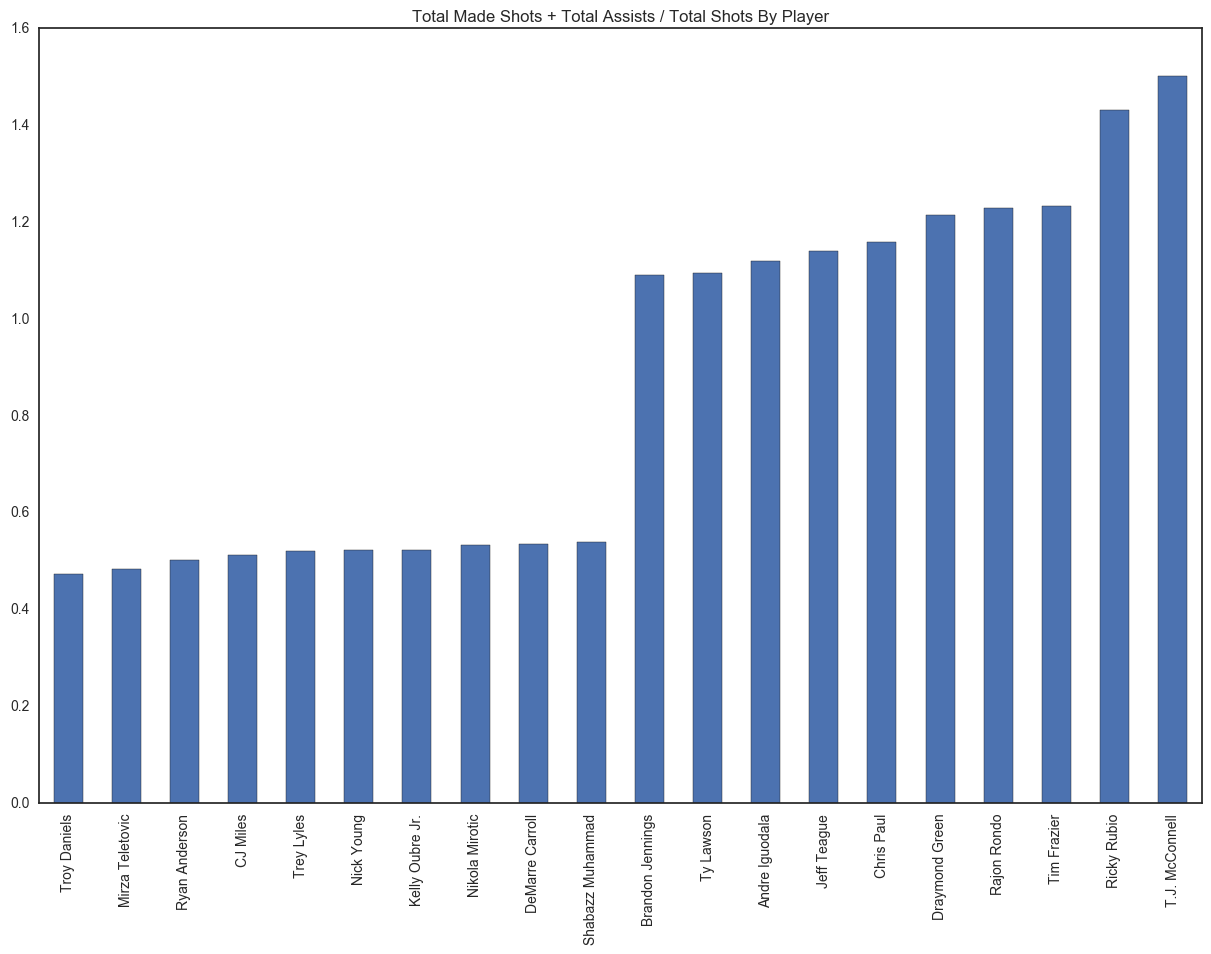

In [350]:
ax = combined_plot.plot(kind='bar', 
               title='Total Made Shots + Total Assists / Total Shots By Player', 
               figsize=(15,10), 
               legend=False)